In [1]:
import networkx as nx
import csv
import random

In [2]:
import numpy as np
import loadNetwork
import localassort
from matplotlib import pyplot as plt

# %matplotlib inline

In [5]:
def convert_gml_multiscaling_format(G, edgelist_name, label_name, null_label_name):
    # relabel node
    H = nx.convert_node_labels_to_integers(G,label_attribute='ins_id')
    # write to edgelist
    nx.write_edgelist(H, edgelist_name, data=False)
    # write label
    gender_preference_dict = nx.get_node_attributes(H, "genderNeutral")
    with open(label_name, 'w') as csvfile:
        for value in list(gender_preference_dict.values()):
            csvfile.write(str(value) + '\n')
    with open(null_label_name, 'w') as csvfile:
        values = list(gender_preference_dict.values())
        random.shuffle(values)
        for value in values:
            csvfile.write(str(value) + '\n')

### Full Graph

In [ ]:
G = nx.read_gml("/Users/xindiwang/Documents/PhD work/Gender Inequality in Art/codes/art_paper_codes_results1990/related_data_results/full_asso.gml")

In [5]:
convert_gml_multiscaling_format(G, "art_gender.edgelist", 'art_gender_label.txt', 'art_gender_label_null.txt')

In [6]:
# get a subgraph excluding neutral nodes
gender_preference_dict = nx.get_node_attributes(G, "genderNeutral")
not_genderNeutral = [node for node in gender_preference_dict if gender_preference_dict[node]!=0]
not_genderNeutral_preference_dict = {node: gender_preference_dict[node] - 1 for node in not_genderNeutral}
G_noNeutral = G.subgraph(not_genderNeutral)
nx.set_node_attributes(G_noNeutral, name="genderNeutral", values=not_genderNeutral_preference_dict)
convert_gml_multiscaling_format(G_noNeutral, 
                                "art_gender_noNeutral.edgelist", 
                                'art_gender_label_noNeutral.txt', 
                                'art_gender_label_noNeutral_null.txt')

In [7]:
# get a subgraph combining women with neutral
gender_preference_dict = nx.get_node_attributes(G, "genderNeutral")
womenCombined_preference_dict = {node: gender_preference_dict[node] if gender_preference_dict[node]!=2 else 0 
                                 for node in gender_preference_dict}
G_womenCombined = G.copy()
nx.set_node_attributes(G_womenCombined, name="genderNeutral", values=womenCombined_preference_dict)
convert_gml_multiscaling_format(G_womenCombined, 
                                "art_gender_womenCombined.edgelist", 
                                'art_gender_label_womenCombined.txt', 
                                'art_gender_label_womenCombined_null.txt')

In [29]:
G = nx.read_gml("/Users/xindiwang/Documents/PhD work/Gender Inequality in Art/codes/art_paper_codes_results1990/related_data_results/full_asso.gml")

In [31]:
# get a subgraph combining men with neutral
gender_preference_dict = nx.get_node_attributes(G, "genderNeutral")
menCombined_preference_dict = {}
for node in gender_preference_dict:
    if gender_preference_dict[node] == 1:
        menCombined_preference_dict[node] = 0
    elif gender_preference_dict[node] == 2:
        menCombined_preference_dict[node] = 1
    else:
        menCombined_preference_dict[node] = 0
G_menCombined = G.copy()
nx.set_node_attributes(G_menCombined, name="genderNeutral", values=menCombined_preference_dict)
convert_gml_multiscaling_format(G_menCombined, 
                                "art_gender_menCombined.edgelist", 
                                'art_gender_label_menCombined.txt', 
                                'art_gender_label_menCombined_null.txt')

### Filtered Graph

In [36]:
G_filtered = nx.read_gml("/Users/xindiwang/Documents/PhD work/Gender Inequality in Art/codes/art_paper_codes_results1990/related_data_results/full_asso_default_filter.gml")

In [37]:
convert_gml_multiscaling_format(G_filtered, 
                                "art_gender_filtered.edgelist", 
                                'art_gender_filtered_label.txt', 
                                'art_gender_filtered_label_null.txt')

In [27]:
# get a subgraph excluding neutral nodes
gender_preference_dict = nx.get_node_attributes(G_filtered, "genderNeutral")
not_genderNeutral = [node for node in gender_preference_dict if gender_preference_dict[node]!=0]
not_genderNeutral_preference_dict = {node: gender_preference_dict[node] - 1 for node in not_genderNeutral}
G_filtered_noNeutral = G_filtered.copy()
nx.set_node_attributes(G_filtered_noNeutral, name="genderNeutral", values=not_genderNeutral_preference_dict)
convert_gml_multiscaling_format(G_filtered_noNeutral, 
                                "art_gender_filtered_noNeutral.edgelist", 
                                'art_gender_filtered_label_noNeutral.txt', 
                                'art_gender_filtered_label_noNeutral_null.txt')

In [7]:
# get a subgraph combining women with neutral
gender_preference_dict = nx.get_node_attributes(G_filtered, "genderNeutral")
womenCombined_preference_dict = {node: gender_preference_dict[node] if gender_preference_dict[node]!=2 else 0 
                                 for node in gender_preference_dict}
G_filtered_womenCombined = G_filtered.subgraph(womenCombined_preference_dict)
nx.set_node_attributes(G_filtered_womenCombined, name="genderNeutral", values=womenCombined_preference_dict)
convert_gml_multiscaling_format(G_filtered_womenCombined, 
                                "art_gender_filtered_womenCombined.edgelist", 
                                'art_gender_filtered_label_womenCombined.txt', 
                                'art_gender_filtered_label_womenCombined_null.txt')

In [27]:
# get a subgraph combining men with neutral
gender_preference_dict = nx.get_node_attributes(G_filtered, "genderNeutral")
menCombined_preference_dict = {}
for node in gender_preference_dict:
    if gender_preference_dict[node] == 1:
        menCombined_preference_dict[node] = 0
    elif gender_preference_dict[node] == 2:
        menCombined_preference_dict[node] = 1
    else:
        menCombined_preference_dict[node] = 0
G_filtered_menCombined = G_filtered.copy()
nx.set_node_attributes(G_filtered_menCombined, name="genderNeutral", values=menCombined_preference_dict)
convert_gml_multiscaling_format(G_filtered_menCombined, 
                                "art_gender_filtered_menCombined.edgelist", 
                                'art_gender_filtered_label_menCombined.txt', 
                                'art_gender_filtered_label_menCombined_null.txt')

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


## Calculate and Plot Multi-scaling

In [6]:
def plot_multiscaling(networkfile, metadatafile, metadatafile_null, label_name, figname=None):
    E, M = loadNetwork.load(networkfile, metadatafile, zero_index=0)
    E_null, M_null = loadNetwork.load(networkfile, metadatafile_null, zero_index=0)
    assortM, assortT, Z = localassort.localAssortF(E,M,pr=np.arange(0,1,0.1))
    assortM_null, assortT_null, Z_null = localassort.localAssortF(E_null,M_null,pr=np.arange(0,1,0.1))
    
    labels = sorted(list(set(M)))
    fig, ax = plt.subplots(1, len(labels)+1, sharex=True, sharey=True, figsize=(5*(len(labels)+1), 5))
    
    plt.figure()
    ax[0].hist(assortT, bins=100, label="observed")
    ax[0].hist(assortT_null,histtype='step', bins=100, label="null")
    ax[0].set_xlabel("assortativity")
    ax[0].set_ylabel("frequency")
    ax[0].legend()
    
    # seperate each label
    for label, label_name in zip(labels, label_name):
        assortT_label = assortT[M == label]
        assortT_null_label = assortT_null[M == label]
        ax[label+1].hist(assortT_label, bins=100, label="observed")
        ax[label+1].hist(assortT_null_label,histtype='step', bins=100, label="null")
        ax[label+1].set_title(label_name)
        ax[label+1].set_xlabel("assortativity")
        ax[label+1].set_ylabel("frequency")
    plt.tight_layout()
    if figname:
        fig.savefig(figname)
    plt.show()

### Full Graph

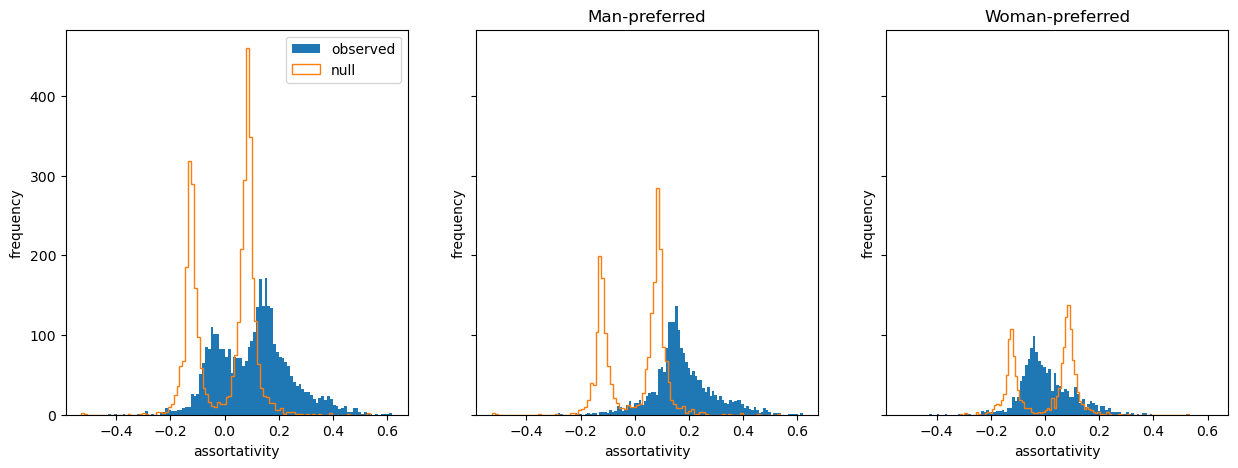

<Figure size 640x480 with 0 Axes>

In [8]:
# in SI
networkfile = "art_gender_noNeutral.edgelist" 
metadatafile ='art_gender_label_noNeutral.txt' 
metadatafile_null = 'art_gender_label_noNeutral_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Man-preferred", "Woman-preferred"],
                 figname="../../../results/SI/fig1/fig1-e.pdf")

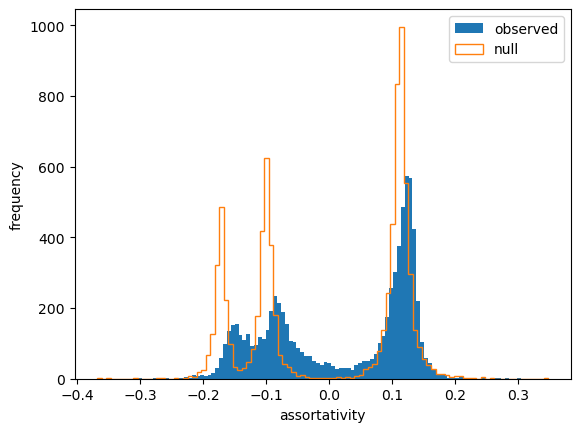

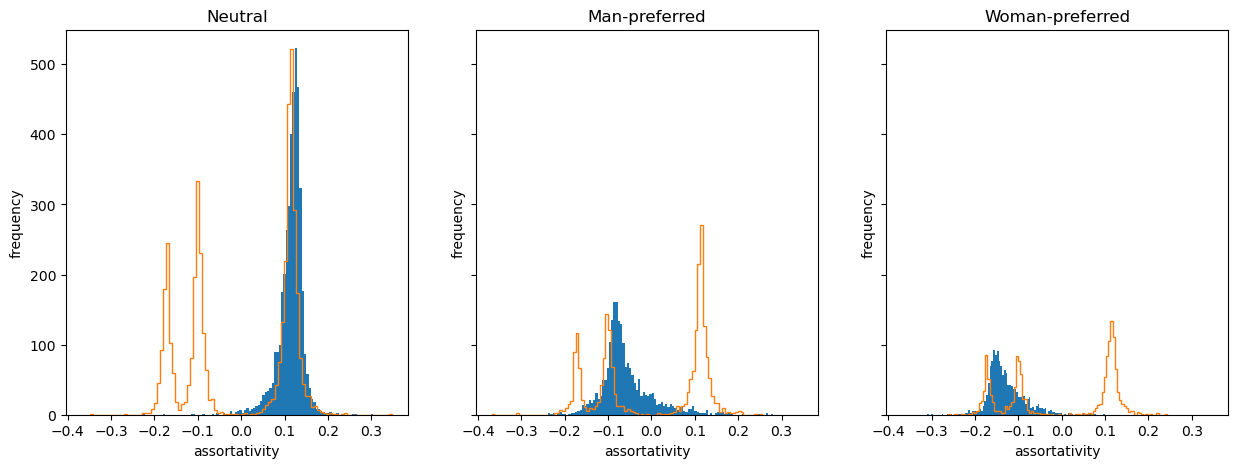

In [60]:
networkfile = 'art_gender.edgelist'
metadatafile = 'art_gender_label.txt'
metadatafile_null = 'art_gender_label_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Neutral", "Man-preferred", "Woman-preferred"])

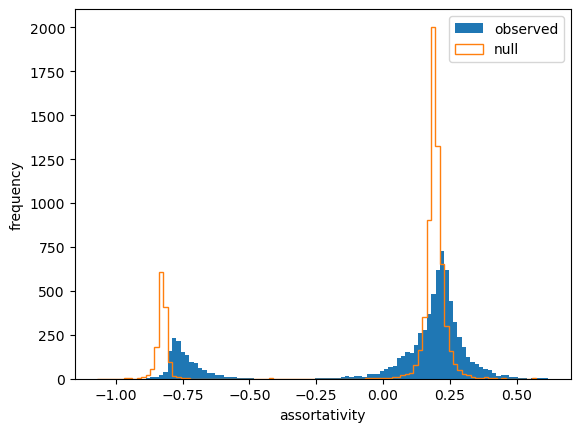

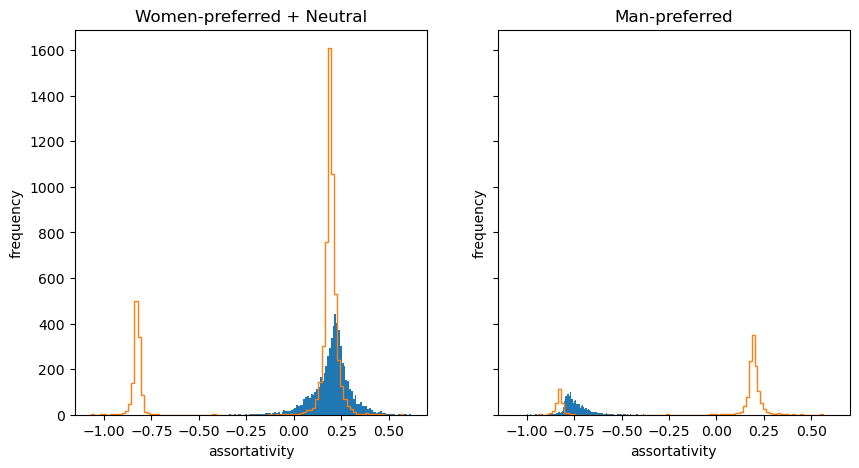

In [62]:
networkfile= "art_gender_womenCombined.edgelist"
metadatafile='art_gender_label_womenCombined.txt'
metadatafile_null='art_gender_label_womenCombined_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Women-preferred + Neutral", "Man-preferred"])

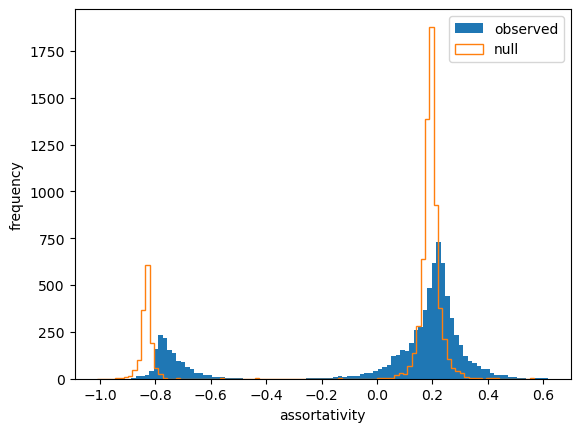

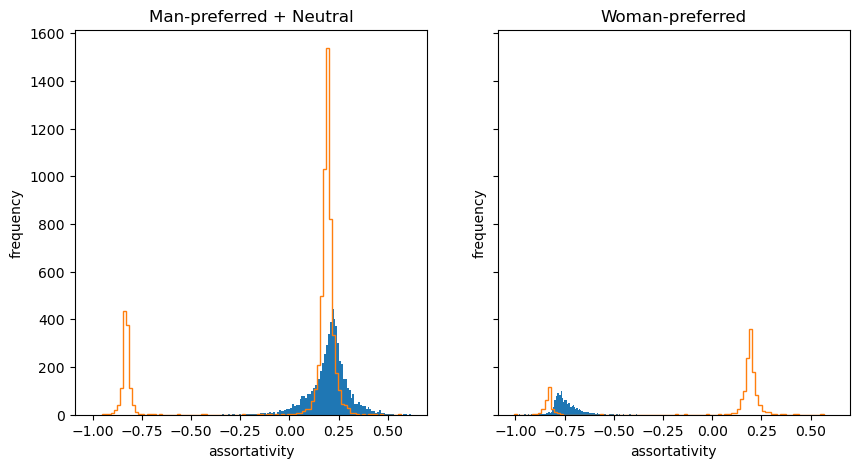

In [63]:
networkfile= "art_gender_menCombined.edgelist"
metadatafile='art_gender_label_menCombined.txt'
metadatafile_null='art_gender_label_menCombined_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Man-preferred + Neutral", "Woman-preferred"])

### Filtered Graph

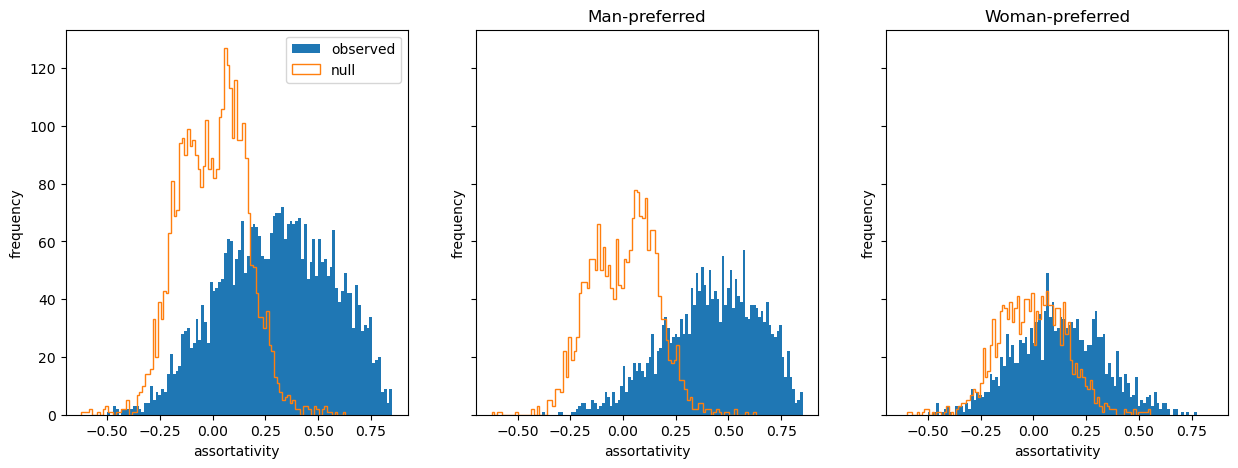

<Figure size 640x480 with 0 Axes>

In [7]:
# in SI
networkfile = 'art_gender_filtered_noNeutral.edgelist'
metadatafile = 'art_gender_filtered_label_noNeutral.txt'
metadatafile_null = 'art_gender_filtered_label_noNeutral_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null,["Man-preferred","Woman-preferred"],
                 figname="../../../results/SI/fig1/fig1-f.pdf")

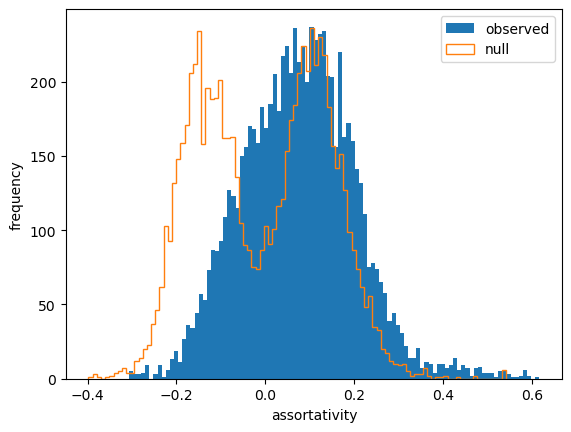

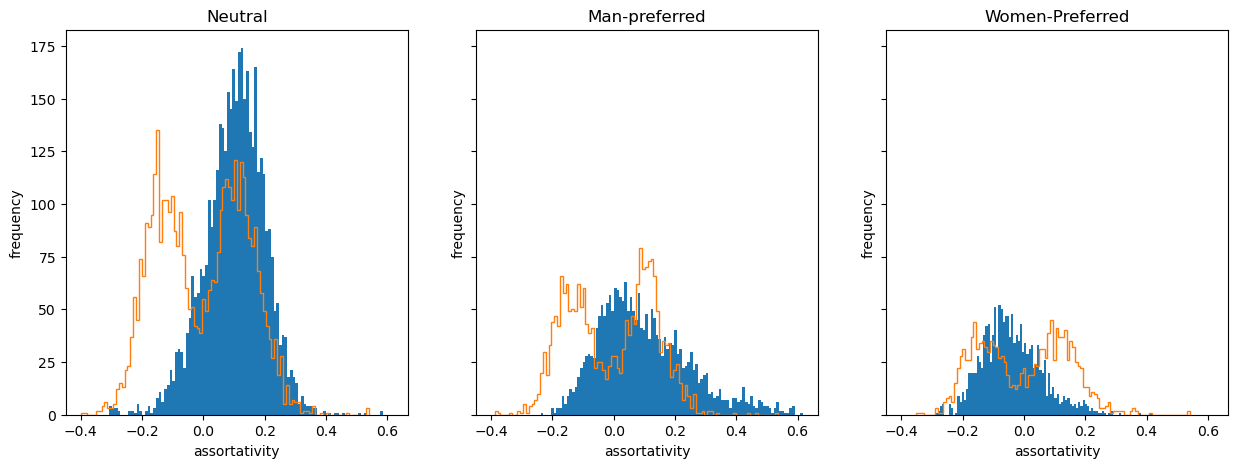

In [64]:
networkfile = 'art_gender_filtered.edgelist'
metadatafile = 'art_gender_filtered_label.txt'
metadatafile_null = 'art_gender_filtered_label_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Neutral", "Man-preferred","Women-Preferred"])

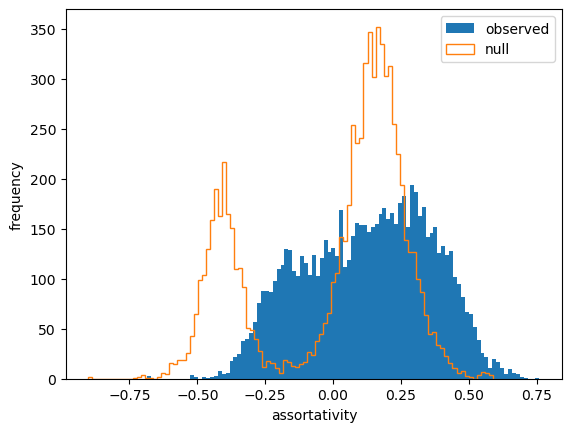

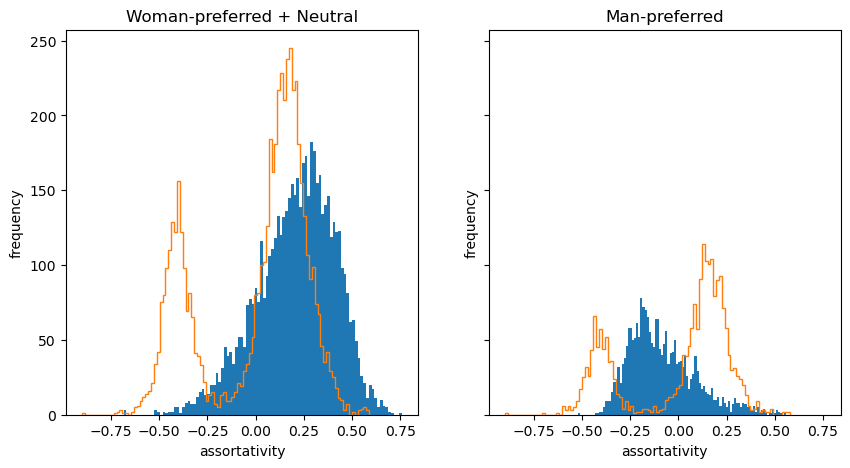

In [66]:
networkfile = 'art_gender_filtered_womenCombined.edgelist'
metadatafile = 'art_gender_filtered_label_womenCombined.txt'
metadatafile_null = 'art_gender_filtered_label_womenCombined_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Woman-preferred + Neutral", "Man-preferred"])

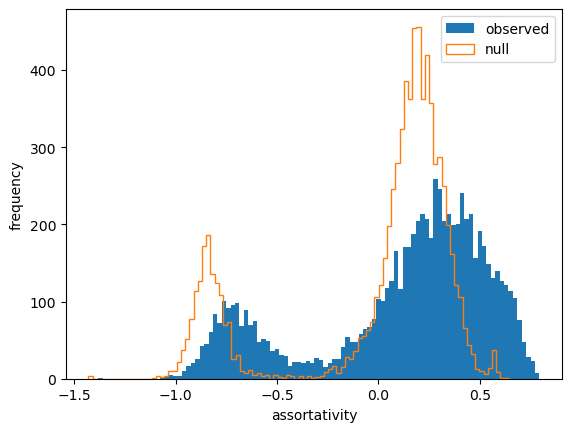

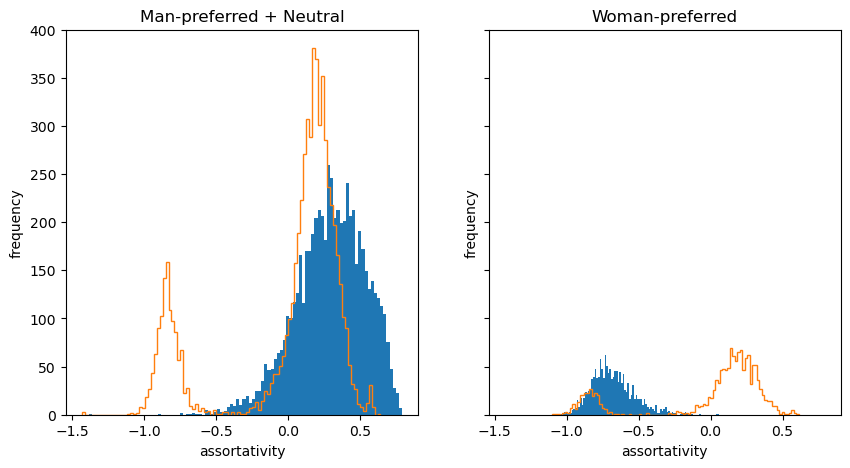

In [67]:
networkfile = 'art_gender_filtered_menCombined.edgelist'
metadatafile = 'art_gender_filtered_label_menCombined.txt'
metadatafile_null = 'art_gender_filtered_label_menCombined_null.txt'
plot_multiscaling(networkfile, metadatafile, metadatafile_null, ["Man-preferred + Neutral", "Woman-preferred"])